#DATASET

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
traffic = pd.read_csv("futuristic_city_traffic.csv")
traffic

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544
...,...,...,...,...,...,...,...,...,...,...,...
1219562,SolarisVille,Autonomous Vehicle,Electromagnetic Storm,Booming,Wednesday,13,75.7534,0,0,60.6027,0.3840
1219563,MetropolisX,Drone,Snowy,Booming,Saturday,1,24.7660,0,0,14.8122,0.5526
1219564,Neuroburg,Autonomous Vehicle,Snowy,Booming,Monday,19,75.6292,0,0,61.8568,0.0564
1219565,MetropolisX,Autonomous Vehicle,Clear,Booming,Monday,1,52.7983,0,0,85.7116,0.5079


#UNIVARIATE ANALYSIS

In [ ]:
print("Dataset Description")
traffic.describe()

Dataset Description


,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
count,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06
mean,1.150817e+01,5.994476e+01,1.546992e-01,4.988738e-02,4.946464e+01,2.770960e-01
std,6.919071e+00,2.663203e+01,3.616178e-01,2.177123e-01,2.528014e+01,2.191019e-01
min,0.000000e+00,6.693400e+00,0.000000e+00,0.000000e+00,4.929600e+00,5.900000e-03
25%,6.000000e+00,3.753310e+01,0.000000e+00,0.000000e+00,2.927395e+01,1.059000e-01
50%,1.200000e+01,5.847110e+01,0.000000e+00,0.000000e+00,4.578260e+01,2.186000e-01
75%,1.700000e+01,8.053455e+01,0.000000e+00,0.000000e+00,6.590550e+01,3.960000e-01
max,2.300000e+01,1.630886e+02,1.000000e+00,1.000000e+00,1.899489e+02,3.377600e+00


In [ ]:
print("Dataset Information")
traffic.info()

Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219567 entries, 0 to 1219566
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   City                   1219567 non-null  object 
 1   Vehicle Type           1219567 non-null  object 
 2   Weather                1219567 non-null  object 
 3   Economic Condition     1219567 non-null  object 
 4   Day Of Week            1219567 non-null  object 
 5   Hour Of Day            1219567 non-null  int64  
 6   Speed                  1219567 non-null  float64
 7   Is Peak Hour           1219567 non-null  int64  
 8   Random Event Occurred  1219567 non-null  int64  
 9   Energy Consumption     1219567 non-null  float64
 10  Traffic Density        1219567 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 102.4+ MB


In [ ]:
# Count of weather
weather_counts = traffic['Weather'].value_counts()
print('Weather Type Counts:')
print(weather_counts)

Weather Type Counts:
Weather
Solar Flare              244237
Snowy                    244195
Electromagnetic Storm    243857
Clear                    243650
Rainy                    243628
Name: count, dtype: int64


In [ ]:
# Count of each Vehicle Type
vehicle_counts = traffic['Vehicle Type'].value_counts()
print('Vehicle Type Counts:')
print(vehicle_counts)

Vehicle Type Counts:
Vehicle Type
Autonomous Vehicle    757454
Drone                 304951
Flying Car             78864
Car                    78298
Name: count, dtype: int64


In [ ]:
# Count of each City Type
city_counts = traffic['City'].value_counts()
print('City Type Counts:')
print(city_counts)

City Type Counts:
City
Ecoopolis       204179
AquaCity        203405
Neuroburg       203184
SolarisVille    202981
MetropolisX     202981
TechHaven       202837
Name: count, dtype: int64


In [ ]:
# Display min and max Traffic Density values
min_density = traffic['Traffic Density'].min()
max_density = traffic['Traffic Density'].max()
print(f'Minimum Traffic Density: {min_density}')
print(f'Maximum Traffic Density: {max_density}')

Minimum Traffic Density: 0.0059
Maximum Traffic Density: 3.3776


# Data Cleaning

In [ ]:
#check for missing values
print('Missing values per column:')
print(traffic.isnull().sum())

Missing values per column:
City                     0
Vehicle Type             0
Weather                  0
Economic Condition       0
Day Of Week              0
Hour Of Day              0
Speed                    0
Is Peak Hour             0
Random Event Occurred    0
Energy Consumption       0
Traffic Density          0
dtype: int64


In [ ]:
# Check for duplicate records
duplicate_count = traffic.duplicated().sum()
print(f'Total duplicate records: {duplicate_count}')

Total duplicate records: 0


# Data Pre-Processing

In [ ]:
# Round off Speed values
traffic['Speed'] = traffic['Speed'].round()

In [ ]:
traffic.head(5)

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.0,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,119.0,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.0,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,77.0,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.0,0,0,40.1934,0.4544


In [ ]:
# Remove rows with 'Flying Cars'
traffic = traffic[traffic['Vehicle Type'] != 'Flying Car']
# Ensure 'Vehicle Type' column is cleaned properly
traffic = traffic.loc[traffic['Vehicle Type'] != 'Flying Car']
vehicle_count = traffic['Vehicle Type'].value_counts()
print(vehicle_count)

Vehicle Type
Autonomous Vehicle    757454
Drone                 304951
Car                    78298
Name: count, dtype: int64


In [ ]:
traffic.head(5)

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.0,0,0,14.7134,0.5241
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.0,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,77.0,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.0,0,0,40.1934,0.4544
5,TechHaven,Autonomous Vehicle,Snowy,Recession,Thursday,20,31.0,0,0,37.5562,0.0843


<ipython-input-15-668e5f849ef0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vehicle_count.index, y=vehicle_count.values, palette='viridis')


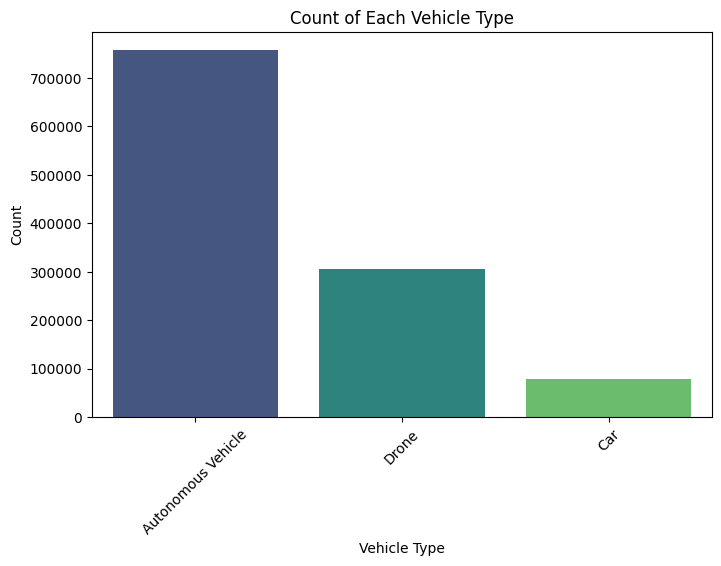

In [ ]:
# Visualization of Vehicle Type Counts
plt.figure(figsize=(8, 5))
sns.barplot(x=vehicle_count.index, y=vehicle_count.values, palette='viridis')
plt.title('Count of Each Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

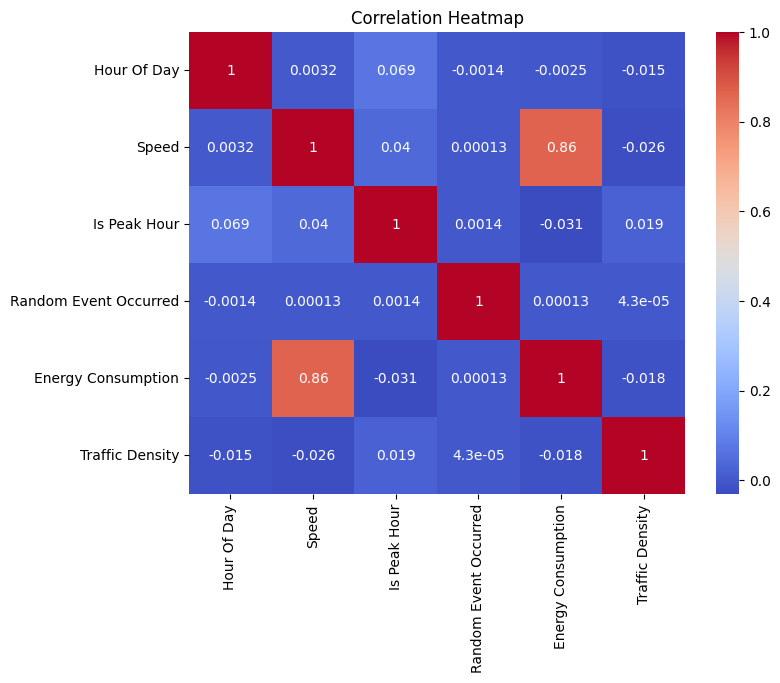

In [ ]:
numeric_df = traffic.select_dtypes(include=[np.number])  # Select only numeric columns
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

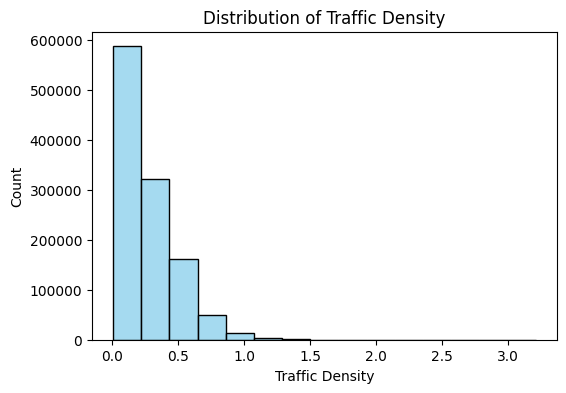

In [ ]:
# Visualizations
# Distribution of Traffic Density
# Feature Selection
X = traffic.drop(columns=['Traffic Density'])
y = traffic['Traffic Density']
plt.figure(figsize=(6, 4))
sns.histplot(y, bins=15, color='skyblue')
plt.title('Distribution of Traffic Density')
plt.show()

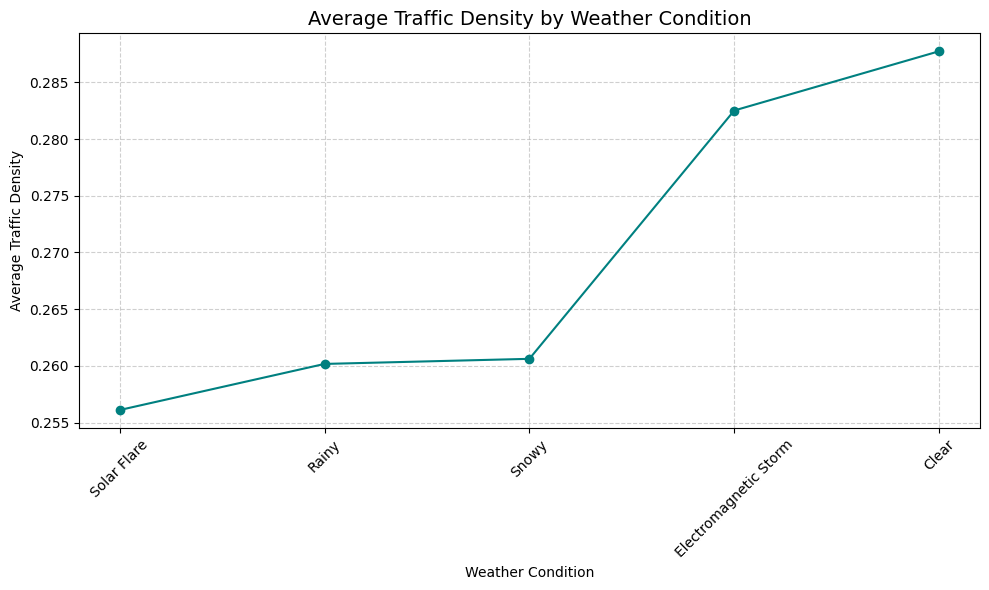

In [ ]:
import matplotlib.pyplot as plt

# Group by Weather and compute mean traffic density
weather_avg = traffic.groupby('Weather')['Traffic Density'].mean().sort_values()

# Line plot
plt.figure(figsize=(10, 6))
plt.plot(weather_avg.index, weather_avg.values, marker='o', linestyle='-', color='teal')
plt.title('Average Traffic Density by Weather Condition', fontsize=14)
plt.xlabel('Weather Condition')
plt.ylabel('Average Traffic Density')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

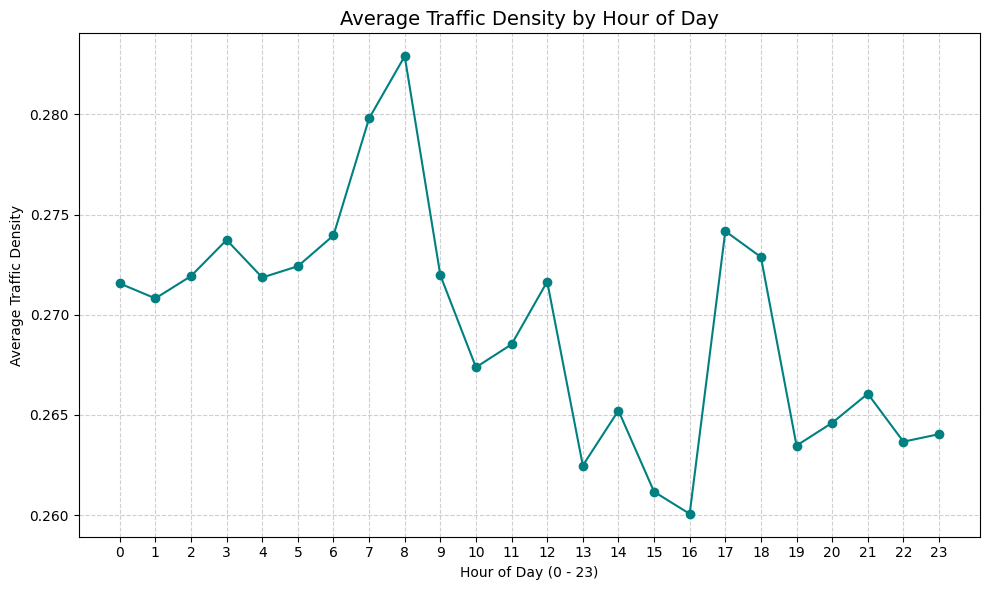

In [ ]:
import matplotlib.pyplot as plt

# Group by Hour Of Day and compute mean traffic density
hourly_avg_density = traffic.groupby('Hour Of Day')['Traffic Density'].mean().sort_index()

# Line plot
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg_density.index, hourly_avg_density.values, marker='o', linestyle='-', color='teal')
plt.title('Average Traffic Density by Hour of Day', fontsize=14)
plt.xlabel('Hour of Day (0 - 23)')
plt.ylabel('Average Traffic Density')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(0, 24))  # Ensures all 24 hours are shown
plt.tight_layout()
plt.show()

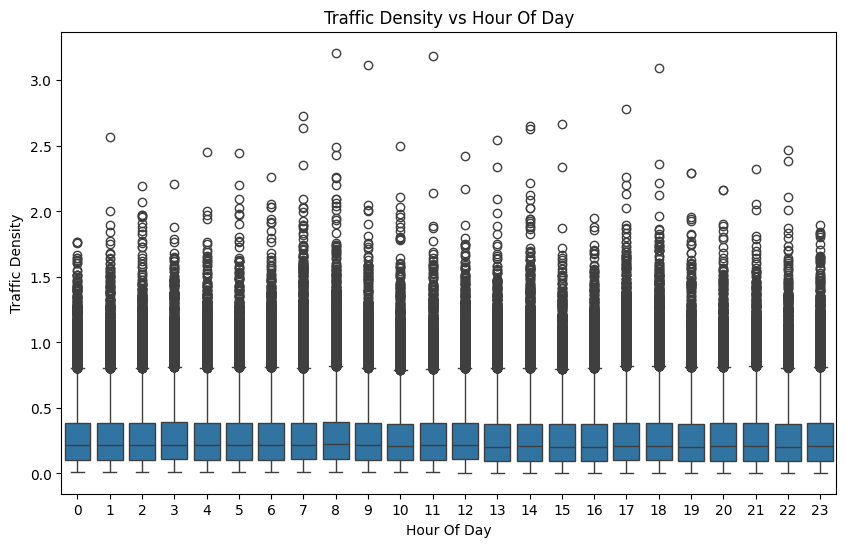

In [ ]:
# Traffic Density vs Hour of Day
plt.figure(figsize=(10, 6))
sns.boxplot(x='Hour Of Day', y='Traffic Density', data=traffic)
plt.title('Traffic Density vs Hour Of Day')
plt.show()

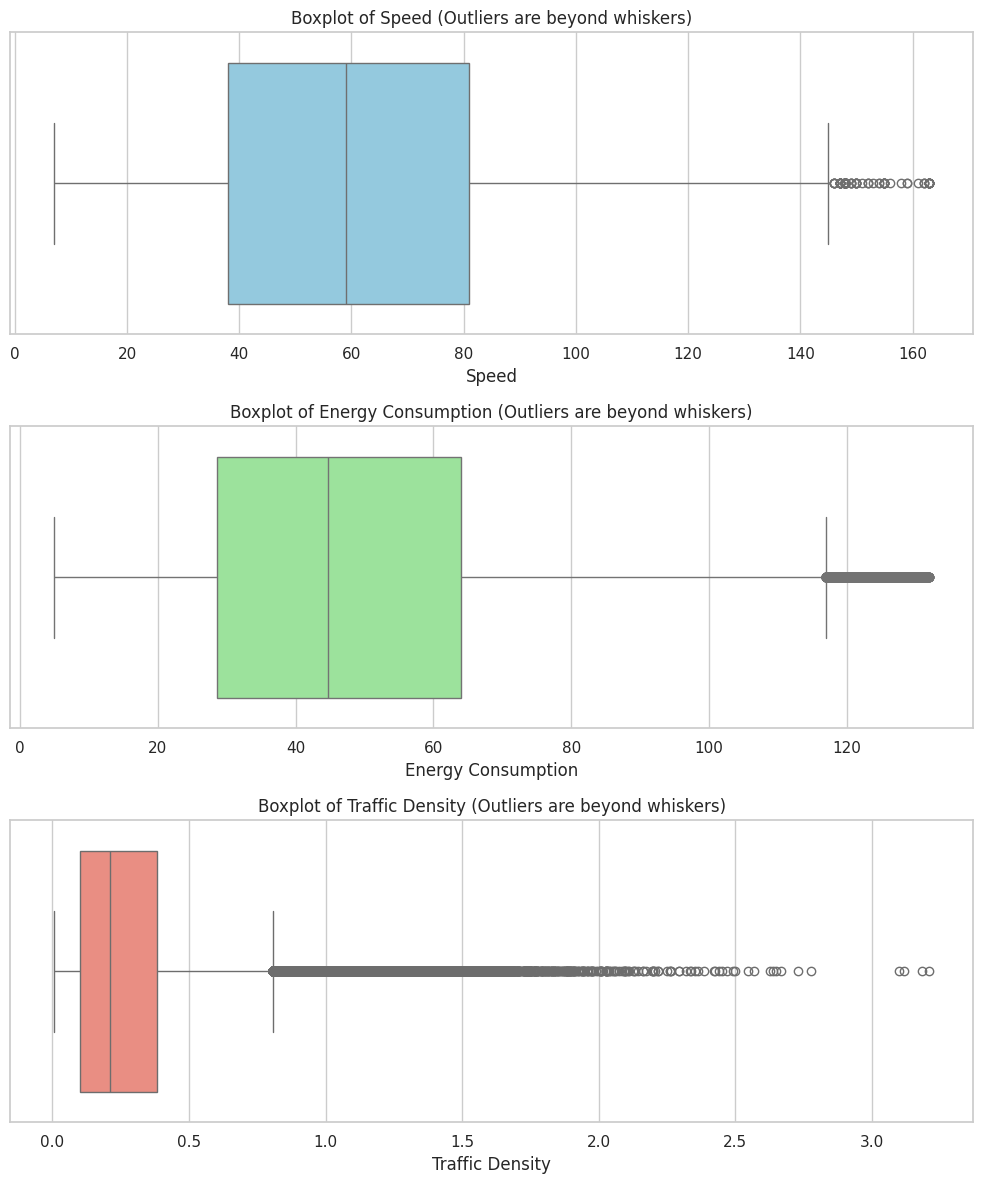

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Set style for plots
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Boxplot for Speed
sns.boxplot(x=traffic['Speed'], ax=axes[0], color="skyblue")
axes[0].set_title('Boxplot of Speed (Outliers are beyond whiskers)')

# Boxplot for Energy Consumption
sns.boxplot(x=traffic['Energy Consumption'], ax=axes[1], color="lightgreen")
axes[1].set_title('Boxplot of Energy Consumption (Outliers are beyond whiskers)')

# Boxplot for Traffic Density
sns.boxplot(x=traffic['Traffic Density'], ax=axes[2], color="salmon")
axes[2].set_title('Boxplot of Traffic Density (Outliers are beyond whiskers)')

plt.tight_layout()
plt.show()


#MODEL

#XGBOOST

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assume your DataFrame is named `traffic`
# Separate features and target
X = traffic.drop("Traffic Density", axis=1)
y = traffic["Traffic Density"]

# One-hot encoding for categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Apply StandardScaler
scaler_xg = StandardScaler()
X_train_scaled = scaler_xg.fit_transform(X_train)
X_test_scaled = scaler_xg.transform(X_test)

# Initialize and train the XGBRegressor
model_xg = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model_xg.fit(X_train_scaled, y_train)

# Predict
y_pred = model_xg.predict(X_test_scaled)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 0.0670
MSE: 0.0107
R² Score: 0.7654


#FEATURE ENGINEERING

In [ ]:
import numpy as np
import pandas as pd

# Assuming df is your DataFrame

# 1. Cyclical Encoding of Hour
traffic['Hour_sin'] = np.sin(2 * np.pi * traffic['Hour Of Day'] / 24)
traffic['Hour_cos'] = np.cos(2 * np.pi * traffic['Hour Of Day'] / 24)

# 2. Interaction Features
traffic['Speed_Density_Interaction'] = traffic['Speed'] * traffic['Traffic Density']

# 3. Energy Efficiency: how much energy per unit speed
traffic['Energy_per_Speed'] = traffic['Energy Consumption'] / (traffic['Speed'] + 0.1)  # add 0.1 to avoid divide-by-zero

# 4. Weekend Feature
# Assuming 5 = Saturday, 6 = Sunday
traffic['Is_Weekend'] = traffic['Day Of Week'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

# 5. Rush Hour Flag (custom: 7-9 AM or 4-6 PM)
traffic['Is_Rush_Hour'] = traffic['Hour Of Day'].apply(lambda x: 1 if (7 <= x <= 9 or 16 <= x <= 18) else 0)

In [ ]:
traffic

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density,Hour_sin,Hour_cos,Speed_Density_Interaction,Energy_per_Speed,Is_Weekend,Is_Rush_Hour
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.0,0,0,14.7134,0.5241,-0.866025,0.500000,15.1989,0.505615,1,0
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.0,0,0,91.2640,0.0415,-0.866025,-0.500000,4.1500,0.911728,0,1
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,77.0,1,0,46.0753,0.1811,0.866025,-0.500000,13.9447,0.597604,0,1
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.0,0,0,40.1934,0.4544,-0.866025,-0.500000,20.4480,0.891206,1,1
5,TechHaven,Autonomous Vehicle,Snowy,Recession,Thursday,20,31.0,0,0,37.5562,0.0843,-0.866025,0.500000,2.6133,1.207595,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219562,SolarisVille,Autonomous Vehicle,Electromagnetic Storm,Booming,Wednesday,13,76.0,0,0,60.6027,0.3840,-0.258819,-0.965926,29.1840,0.796356,0,0
1219563,MetropolisX,Drone,Snowy,Booming,Saturday,1,25.0,0,0,14.8122,0.5526,0.258819,0.965926,13.8150,0.590127,1,0
1219564,Neuroburg,Autonomous Vehicle,Snowy,Booming,Monday,19,76.0,0,0,61.8568,0.0564,-0.965926,0.258819,4.2864,0.812836,0,0
1219565,MetropolisX,Autonomous Vehicle,Clear,Booming,Monday,1,53.0,0,0,85.7116,0.5079,0.258819,0.965926,26.9187,1.614154,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
categorical_cols = ['City', 'Vehicle Type', 'Weather', 'Economic Condition', 'Day Of Week']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    traffic[col] = le.fit_transform(traffic[col])
    label_encoders[col] = le

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assume your DataFrame is named `traffic`
# Separate features and target
X = traffic.drop("Traffic Density", axis=1)
y = traffic["Traffic Density"]

# One-hot encoding for categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Apply StandardScaler
scaler_xg = StandardScaler()
X_train_scaled = scaler_xg.fit_transform(X_train)
X_test_scaled = scaler_xg.transform(X_test)

# Initialize and train the XGBRegressor
model_xg = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model_xg.fit(X_train_scaled, y_train)

# Predict
y_pred = model_xg.predict(X_test_scaled)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 0.0031
MSE: 0.0001
R² Score: 0.9979


#MLP

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Preprocess the data
X = traffic.drop("Traffic Density", axis=1)
y = traffic["Traffic Density"]

X_encoded = pd.get_dummies(X, drop_first=True)
column_structure = X_encoded.columns

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)
scaler_mlp = StandardScaler()
X_train_mlp_scaled = scaler_mlp.fit_transform(X_train)
X_test_mlp_scaled = scaler_mlp.transform(X_test)

# Train the MLP model
mlp_model = MLPRegressor(hidden_layer_sizes=(128, 64, 32), activation='relu',
                   solver='adam', max_iter=500, early_stopping=True, random_state=42)
mlp_model.fit(X_train_mlp_scaled, y_train)
y_pred_mlp = mlp_model.predict(X_test_mlp_scaled)

mae = mean_absolute_error(y_test, y_pred_mlp)
r2 = r2_score(y_test, y_pred_mlp)
mse = mean_squared_error(y_test, y_pred_mlp)

print("Multilayer Perceptron Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print("MSE : {ms}")

Multilayer Perceptron Performance:
Mean Absolute Error (MAE): 0.0015
R² Score: 0.9999


In [ ]:
print(f"Mean Squared Error (MAE): {mse:.4f}")

Mean Squared Error (MAE): 0.0000


# K-Fold Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression  # Remove if using your own dataset
from sklearn.metrics import r2_score
import numpy as np

# Only needed if you're testing without your own dataset
# X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Step 1: Feature scaling
scaler_mlp = StandardScaler()
X_scaled = scaler_mlp.fit_transform(X)  # Replace X with your dataset
y_scaled = y  # Replace y with your actual target

# Step 2: Define the model
mlp_cv = MLPRegressor(hidden_layer_sizes=(128, 64, 32), activation='relu',
                      solver='adam', max_iter=500, random_state=42)

# Step 3: Perform 5-Fold Cross-Validation
scores = cross_val_score(mlp_cv, X_scaled, y_scaled, scoring='r2', cv=5)

# Step 4: Output results
print("🧪 Cross-Validation R² Scores:", scores)
print("📊 Average CV R² Score:", np.mean(scores))

🧪 Cross-Validation R² Scores: [0.9998963  0.99981465 0.9998492  0.99968517 0.99977126]
📊 Average CV R² Score: 0.9998033176572931


#RANDOMFOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor


# Feature Scaling (optional for tree-based models, but consistent)
scaler_rf = StandardScaler()
X_train_rf_scaled = scaler_rf.fit_transform(X_train)
X_test_rf_scaled = scaler_rf.transform(X_test)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf_scaled, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predict
y_pred_rf = rf_model.predict(X_test_rf_scaled)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 0.0002
MSE: 0.0000
R² Score: 0.9998


#USER INPUT

In [1]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.6/322.6 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 113.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.8 MB/s eta 0:00:00


In [ ]:
import gradio as gr

def predict_traffic_density(city, vehicle_type, weather, economic_condition, day_of_week, time):
    input_data = {
        "City": city,
        "Vehicle Type": vehicle_type,
        "Weather": weather,
        "Economic Condition": economic_condition,
        "Day Of Week": day_of_week,
        "Time": time
    }

    input_df = pd.DataFrame([input_data])

    # Apply one-hot encoding
    input_encoded = pd.get_dummies(input_df)

    # Align with training column structure
    input_encoded = input_encoded.reindex(columns=column_structure, fill_value=0)

    # Scale using the MLP scaler
    input_scaled = scaler_mlp.transform(input_encoded)

    # Predict
    predicted_density = mlp_model.predict(input_scaled)[0]

    # Interpret result
    if predicted_density < 0.3:
        label = "Low"
    elif predicted_density < 0.6:
        label = "Moderate"
    else:
        label = "High"

    return f"Predicted Traffic Density: {predicted_density:.4f} ({label})"




# Build Gradio UI
iface = gr.Interface(
    fn=predict_traffic_density,
    inputs=[
        gr.Dropdown(['MetropolisX', 'TechHaven', 'Ecoopolis', 'SolarisVille', 'Neuroburg'], label="City"),
        gr.Dropdown(['Car', 'Drone','Autonomous Vehicle'], label="Vehicle Type"),
        gr.Dropdown(['Clear', 'Rainy', 'Solar Flare', 'Snowy', 'Electromagnetic Storm'], label="Weather"),
        gr.Dropdown(['Stable', 'Developing', 'Recession'], label="Economic Condition"),
        gr.Dropdown(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], label="Day Of Week"),
        gr.Slider(minimum=0, maximum=23, step=1, label="Time (Hour)")
    ],
    outputs="text",
    title="Real-Time Traffic Density Predictor",
    description="Enter conditions to predict traffic density and get a real-time traffic level (Low/Moderate/High)"
)

iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4c08a510339796f3cd.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
